# PROJECT LAYOUT

#### The aim of this project is to predict the selling price of cars using the k-Nearest Neighbors algorithm. Thus, the target is to find the optimal number of nearest neighbors(k) and the features that best predict our target variables.

#### The dataset contains values for various features of the cars and was collected in 1985.

# A. Reading in the data

In [121]:
# Importing the libraries.

import pandas as pd
import numpy as np

cars = pd.read_csv("imports-85.data")

In [122]:
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### Since, the dataset does not have proper column names, we'll have to name the columns ourselves. The column names are given after looking at the dataset documentation, which is found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [123]:
cars.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
        "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", 
        "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-rate", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [124]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# B. DATA CLEANING

#### Removing Non-numeric columns

In [125]:
# Since the k-Nearest Neighbors algorithm cannot take anything but numerical values to calculate euclidean distance,
# we keep columns with only the numerical values.

cols = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "bore", "stroke", "compression-rate", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

numeric_cars = cars[cols]

# Above, we can see '?' in normalized losses column. Replacing them with np.nan.

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250


In [126]:
# Converting the whole df to float datatype so that any anomaly is converted to float as well.

numeric_cars = numeric_cars.astype('float')

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


#### Dealing with Null values

In [127]:
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [128]:
# Since the price column is the target variable, a null value makes the row of no use.

numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### Filling the null values with respective column names.

In [129]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### NORMALIZING THE COLUMNS

In [130]:
# Here, we see that differences between values of rows in different columns is different.
# Example: in rows 2 & 3, curb-weight differs by nearly 500 whereas highway-mpg differs by only 8.
# This skews our results to the curb weight.

# To avoid this, we can normalize the whole of the dataframe, except the price column. This limits the values
# between the (-1, 1) range.

price_col = numeric_cars["price"] # Creating a temp. variable to exclude price df.

numeric_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.std())

numeric_cars["price"] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.697177,-0.439616,-0.855008,-2.055427,-0.014857,0.521295,-1.845608,-0.291493,0.204013,-0.246603,-0.652936,-0.542680,16500.0
1,0.000000,-0.720075,-0.245239,-0.189262,-0.572999,0.515422,-2.420296,0.668901,-0.291493,1.352043,-0.246603,-0.963857,-0.689152,16500.0
2,1.309368,0.157661,0.192109,0.143611,0.209393,-0.421726,-0.521295,0.446096,-0.042375,-0.036272,0.796716,-0.186553,-0.103263,13950.0
3,1.309368,0.091417,0.192109,0.238717,0.209393,0.517350,-0.521295,0.446096,-0.540611,0.310807,0.796716,-1.119318,-1.275042,17450.0
4,0.000000,0.157661,0.248803,0.191164,-0.284750,-0.093917,-0.521295,0.446096,-0.416052,0.177315,0.796716,-0.963857,-0.835625,15250.0


# C. TRAINING THE MODEL

#### First training the model on each feature individually

In [131]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    # Training on a random number of features, say 5.
    
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
    
    np.random.seed(1)
    shuffled_indexes = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_indexes)
    
    last_train_row = int(len(randomized_df)/2)
    
    # Creating test and train datasets
    
    train_df = randomized_df.iloc[:last_train_row]
    test_df = randomized_df.iloc[last_train_row:]
    
    # Training the model
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Predicting
    
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculating Root mean square error
    
    rmse_val = (mean_squared_error(test_df[target_col], predictions))**(1/2)
    
    return rmse_val

rmse_values = {}

columns = numeric_cars.columns.drop("price")

# Calculating RMSE for all columns individually

for col in columns:
    rmse = knn_train_test(col, "price", numeric_cars)
    rmse_values[col] = rmse
    
rmse_values

{'bore': 6162.56552565569,
 'city-mpg': 3926.524606009747,
 'compression-rate': 7001.541387894526,
 'curb-weight': 3425.134715890749,
 'height': 7267.324352001911,
 'highway-mpg': 3789.994140892569,
 'horsepower': 4448.780283448487,
 'length': 5127.089153038008,
 'normalized-losses': 8198.617865933256,
 'peak-rpm': 6350.427658040047,
 'stroke': 8158.401181873812,
 'wheel-base': 5443.857347028851,
 'width': 3779.2396220933124}

In [132]:
# Converting the rmse_values dictionary to a series

rmse_results_series = pd.Series(rmse_values)
rmse_results_series.sort_values()

curb-weight          3425.134716
width                3779.239622
highway-mpg          3789.994141
city-mpg             3926.524606
horsepower           4448.780283
length               5127.089153
wheel-base           5443.857347
bore                 6162.565526
peak-rpm             6350.427658
compression-rate     7001.541388
height               7267.324352
stroke               8158.401182
normalized-losses    8198.617866
dtype: float64

#### Running the model for different k values for individual features.

In [133]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Introducing k values in the function
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fitting the model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Prediting
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        # Storing results in a dictionary
        k_rmses[k] = rmse
    return k_rmses

k_rmse_for_each_feature = {}

# Calculating a dictionary containing rmse values for each k value for individual columns
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_for_each_feature[col] = rmse_val

k_rmse_for_each_feature

{'bore': {1: 5930.84684678335,
  3: 5959.555555110167,
  5: 6162.56552565569,
  7: 6297.845002402466,
  9: 6527.279706927622},
 'city-mpg': {1: 4142.162823936307,
  3: 3521.805549714521,
  5: 3926.524606009747,
  7: 3700.3759582021958,
  9: 3874.8990304009817},
 'compression-rate': {1: 7344.202947903877,
  3: 5943.417906577177,
  5: 7001.541387894526,
  7: 7340.459359242708,
  9: 7196.820045283717},
 'curb-weight': {1: 4390.877922466076,
  3: 3689.295868680996,
  5: 3425.134715890749,
  7: 3174.0695108639184,
  9: 3373.828245571681},
 'height': {1: 10805.760867703857,
  3: 7567.170430513934,
  5: 7267.324352001911,
  7: 7291.277126715966,
  9: 7128.03761246329},
 'highway-mpg': {1: 3663.1778717392363,
  3: 3487.391091887713,
  5: 3789.994140892569,
  7: 3997.5583082625803,
  9: 4033.604434124354},
 'horsepower': {1: 4204.07383617367,
  3: 4180.184105727614,
  5: 4448.780283448487,
  7: 4642.006590816484,
  9: 4593.479918171187},
 'length': {1: 6395.364475149168,
  3: 6115.700260894994,

#### Averaging rmse of each column

In [134]:
feature_avg_rmse = {}
for k,v in k_rmse_for_each_feature.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

curb-weight          3610.641253
highway-mpg          3794.345169
city-mpg             3833.153594
width                4131.930755
horsepower           4413.704947
wheel-base           5422.120467
length               5510.200222
bore                 6175.618527
compression-rate     6965.288329
peak-rpm             7105.387868
normalized-losses    7631.735696
stroke               7644.893433
height               8011.914078
dtype: float64

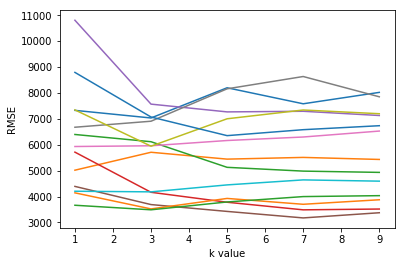

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_for_each_feature.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# D. FINDING THE BEST FEATURES AND k VALUES

## BEST FEATURES

In [136]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 2641.8423602478633},
 'four best features': {5: 2562.4044395059886},
 'six best features': {5: 2760.527875389053},
 'three best features': {5: 2518.5801752574803},
 'two best features': {5: 2968.02533809939}}

## BEST k VALUE

In [137]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 3187.07815404643,
  2: 2923.038646682592,
  3: 2749.046704465629,
  4: 2654.273247519931,
  5: 2641.8423602478633,
  6: 2815.9489642826347,
  7: 2929.925123790779,
  8: 3007.403852318059,
  9: 3120.561408793197,
  10: 3215.793053618345,
  11: 3370.7476363707765,
  12: 3432.169700159717,
  13: 3556.6248311296886,
  14: 3561.602661337294,
  15: 3561.0445919077674,
  16: 3659.815896624788,
  17: 3716.6928873659367,
  18: 3806.174636327427,
  19: 3880.3526764744875,
  20: 3948.3191146613262,
  21: 4022.037085162414,
  22: 4079.485740363171,
  23: 4125.533656748889,
  24: 4177.32471716307},
 'four best features': {1: 3103.205955137364,
  2: 2926.9329309876575,
  3: 2646.3709635398186,
  4: 2522.389019610179,
  5: 2562.4044395059886,
  6: 2643.2397052039505,
  7: 2892.7078204495174,
  8: 3023.274220526481,
  9: 3098.164768550314,
  10: 3155.614552127683,
  11: 3282.1423677830758,
  12: 3384.6318063437698,
  13: 3477.5784779407472,
  14: 3569.759854696683,
  15: 360

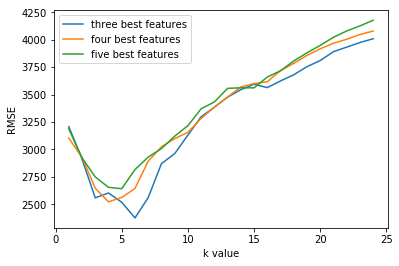

In [138]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

plt.legend(k_rmse_results)
plt.show()

#### CONCLUSION:

#### From the chart, we can conclude that the lowest rmse is attained for 'three best features' at a 'k' value of 6.

#### Features: "horsepower", "width", "cub-weight", k = 6.

# E. PREDICTING PRICES WITH BEST FEATURES AND k VALUES

In [147]:
np.random.seed(1)

shuffled_index = np.random.permutation(numeric_cars.index)
rand_df = numeric_cars.reindex(shuffled_index)

last_train_row = int(len(rand_df) / 2)
    
train_df = rand_df.iloc[0:last_train_row]
test_df = rand_df.iloc[last_train_row:]

train_cols = ["horsepower", "width", "curb-weight"]
target_col = ["price"]

knn = KNeighborsRegressor(n_neighbors=6)

knn.fit(train_df[train_cols], train_df[target_col])

predicted_labels = knn.predict(test_df[train_cols])

predicted_labels = list(predicted_labels)

predicted_labels[:5]

[array([9108.66666667]),
 array([9108.66666667]),
 array([7302.83333333]),
 array([7521.33333333]),
 array([10796.])]